In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
tf.debugging.set_log_device_placement(False)
import warnings
warnings.filterwarnings('ignore')

In [2]:
tf.random.set_seed(14)

In [3]:
data = pd.read_csv('/content/gas_turbines.csv')
data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [4]:
df = data.copy()
df = df.drop(['AFDP','GTEP','TIT','TAT','CDP','CO','NOX'],axis=1)
df.head()

,AT,AP,AH,TEY
0,6.8594,1007.9,96.799,114.70
1,6.7850,1008.4,97.118,114.72
2,6.8977,1008.8,95.939,114.71
3,7.0569,1009.2,95.249,114.72
4,7.3978,1009.7,95.150,114.72


EDA

In [5]:
df.isnull().sum()

AT     0
AP     0
AH     0
TEY    0
dtype: int64

In [23]:
df.nunique()

AT     12086
AP       540
AH     12637
TEY     4207
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   TEY     15039 non-null  float64
dtypes: float64(4)
memory usage: 470.1 KB


In [7]:
df.describe()

,AT,AP,AH,TEY
count,15039.000000,15039.00000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,134.188464
std,7.574323,6.41076,13.793439,15.829717
min,0.522300,985.85000,30.344000,100.170000
25%,11.408000,1008.90000,69.750000,127.985000
50%,18.186000,1012.80000,82.266000,133.780000
75%,23.862500,1016.90000,90.043500,140.895000
max,34.929000,1034.20000,100.200000,174.610000


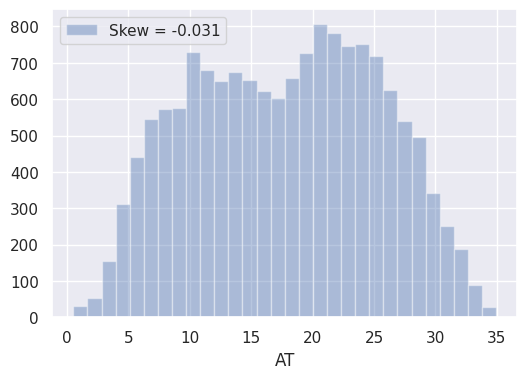

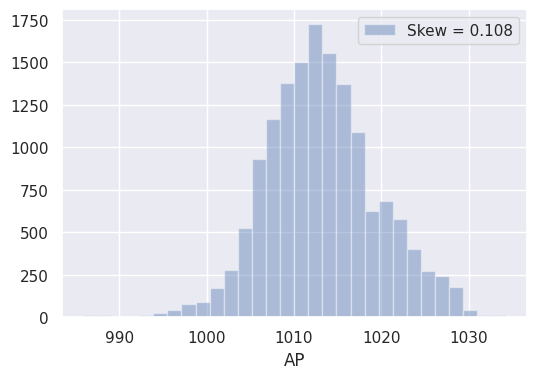

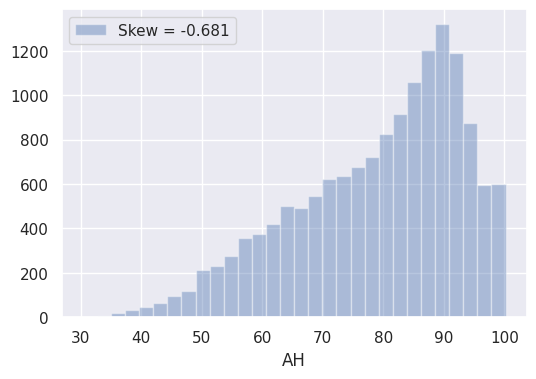

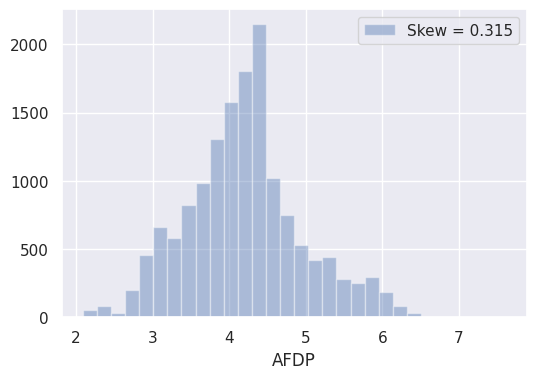

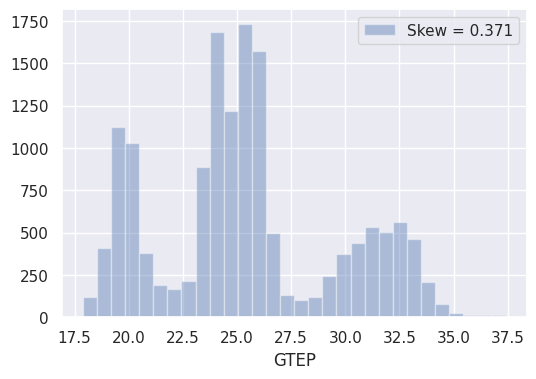

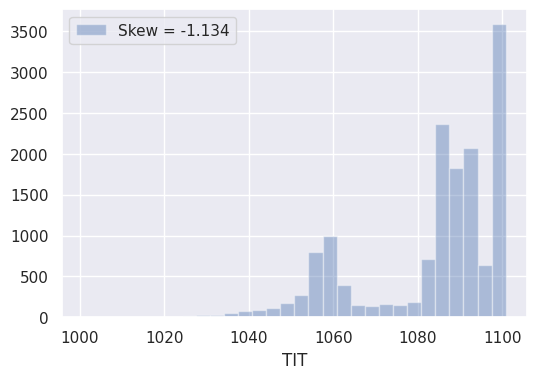

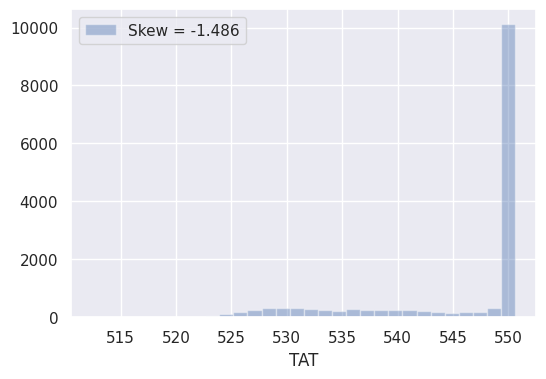

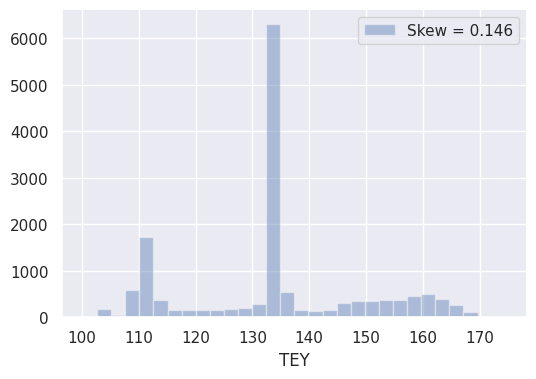

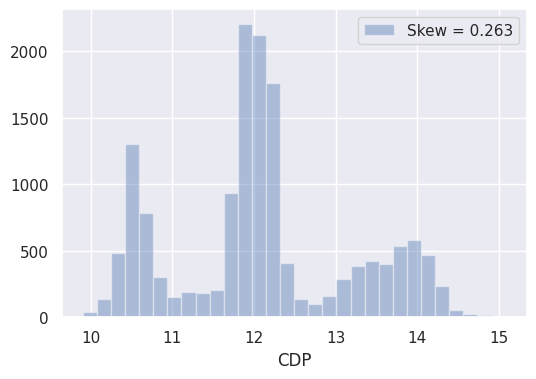

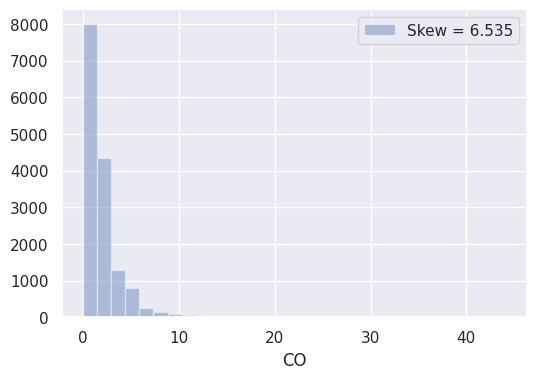

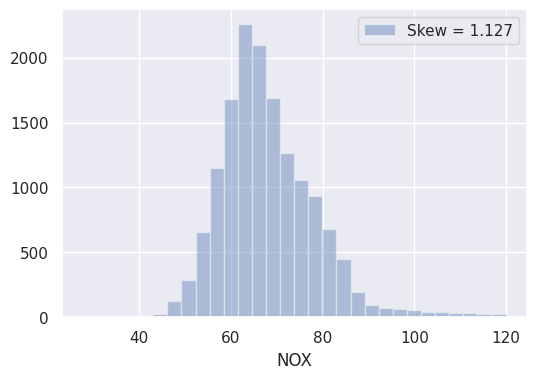

In [24]:
numerical_features=[feature for feature in data.columns if data[feature].dtypes != 'O']
for feat in numerical_features:
    skew = data[feat].skew()
    sns.distplot(data[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

<Axes: >

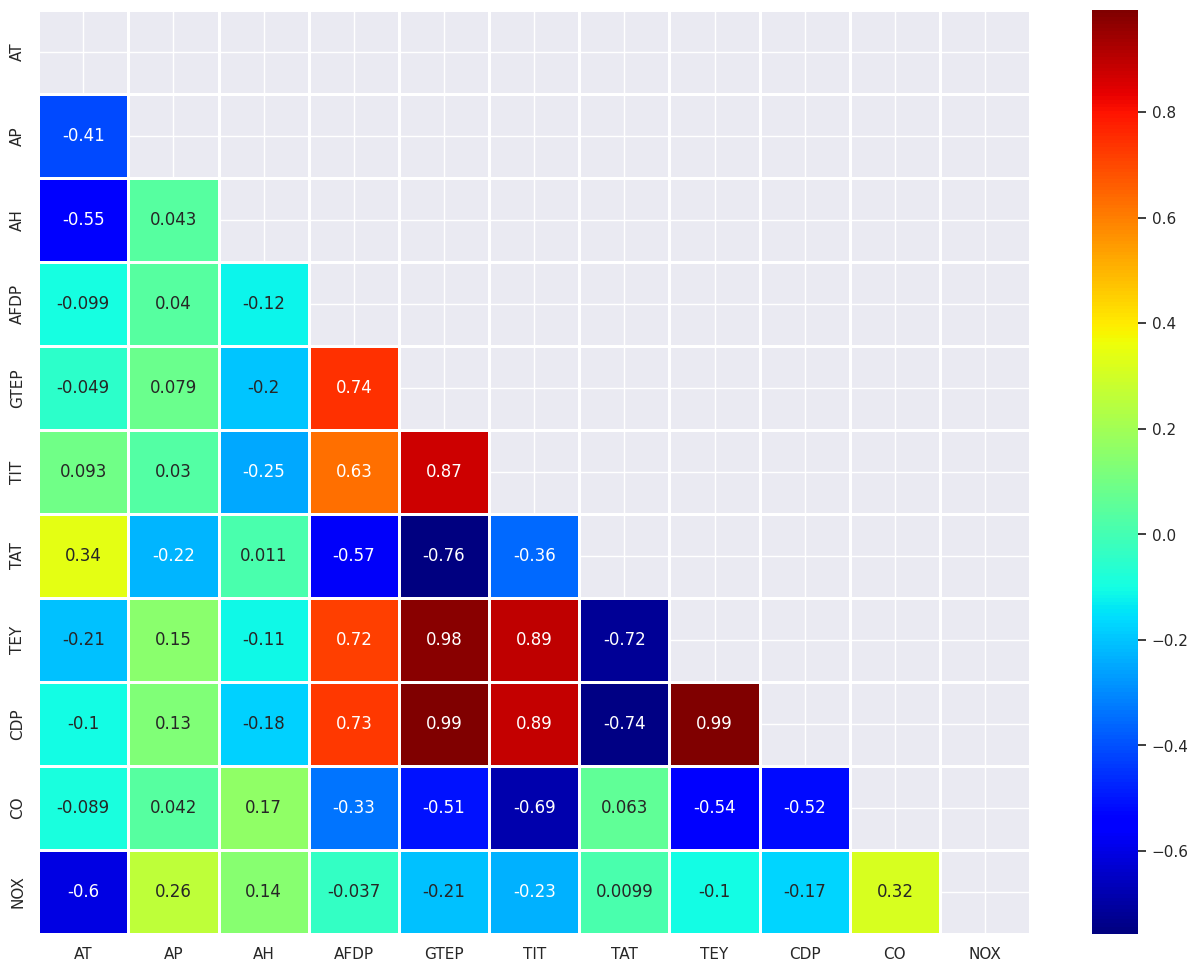

In [25]:
plt.figure(figsize=(16,12))
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=data.corr(), cmap="jet", annot=True,linewidths=1, linecolor='white',mask=mask)

Splitting data into training and testing

In [8]:
X =df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [9]:
X

,AT,AP,AH
0,6.8594,1007.9,96.799
1,6.7850,1008.4,97.118
2,6.8977,1008.8,95.939
3,7.0569,1009.2,95.249
4,7.3978,1009.7,95.150
...,...,...,...
15034,9.0301,1005.6,98.460
15035,7.8879,1005.9,99.093
15036,7.2647,1006.3,99.496
15037,7.0060,1006.8,99.008


In [10]:
Y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)

In [12]:
y_train=np.reshape(y_train.to_numpy(), (-1,1))
y_test=np.reshape(y_test.to_numpy(), (-1,1))

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

print(scaler_x.fit(X_train))
xtrain_scale=scaler_x.transform(X_train)

print(scaler_x.fit(X_test))
xtest_scale=scaler_x.transform(X_test)

print(scaler_y.fit(y_train))
ytrain_scale=scaler_y.transform(y_train)

print(scaler_y.fit(y_test))
ytest_scale=scaler_y.transform(y_test)

MinMaxScaler()
MinMaxScaler()
MinMaxScaler()
MinMaxScaler()


In [14]:
len(xtrain_scale)

10527

Model Building

In [15]:
model1 = Sequential()
model1.add(Dense(4, input_dim=3, kernel_initializer='normal', activation='relu'))
model1.add(Dense(2106,kernel_initializer='normal', activation='relu'))
model1.add(Dense(1, activation='linear'))
# Compile model
model1.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse','mae'])
# Fit the model
hist1 = model1.fit(xtrain_scale, ytrain_scale, validation_split=0.33, epochs=100, batch_size=150)
#At epoch 50, mse and mae just keeps oscillating back and forth

Epoch 1/100
48/48 [==============================] - 2s 17ms/step - loss: 0.0739 - mse: 0.0739 - mae: 0.2103 - val_loss: 0.0458 - val_mse: 0.0458 - val_mae: 0.1552
Epoch 2/100
48/48 [==============================] - 1s 10ms/step - loss: 0.0460 - mse: 0.0460 - mae: 0.1536 - val_loss: 0.0452 - val_mse: 0.0452 - val_mae: 0.1552
Epoch 3/100
48/48 [==============================] - 1s 11ms/step - loss: 0.0455 - mse: 0.0455 - mae: 0.1547 - val_loss: 0.0440 - val_mse: 0.0440 - val_mae: 0.1498
Epoch 4/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0440 - mse: 0.0440 - mae: 0.1536 - val_loss: 0.0424 - val_mse: 0.0424 - val_mae: 0.1510
Epoch 5/100
48/48 [==============================] - 0s 6ms/step - loss: 0.0428 - mse: 0.0428 - mae: 0.1563 - val_loss: 0.0420 - val_mse: 0.0420 - val_mae: 0.1584
Epoch 6/100
48/48 [==============================] - 0s 6ms/step - loss: 0.0422 - mse: 0.0422 - mae: 0.1599 - val_loss: 0.0411 - val_mse: 0.0411 - val_mae: 0.1574
Epoch 7/100
48/48 [

Model Evaluation

In [16]:
y_predict = model1.predict(xtest_scale)

141/141 [==============================] - 0s 1ms/step


In [17]:
print(hist1.history.keys())

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


In [18]:
hist1_df = pd.DataFrame(hist1.history)
hist1_df["epoch"]=hist1.epoch
hist1_df.tail()

,loss,mse,mae,val_loss,val_mse,val_mae,epoch
95,0.038737,0.038737,0.155454,0.038392,0.038392,0.154411,95
96,0.038805,0.038805,0.155546,0.038493,0.038493,0.152797,96
97,0.038852,0.038852,0.156108,0.038579,0.038579,0.153383,97
98,0.038864,0.038864,0.155420,0.038314,0.038314,0.154278,98
99,0.038994,0.038994,0.156930,0.038904,0.038904,0.153652,99


Visualizing Training History

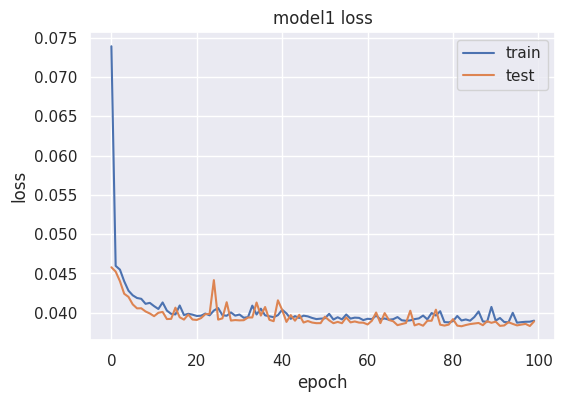

In [21]:
sns.set(rc={'figure.figsize':(6,4)})

plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])
plt.title('model1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

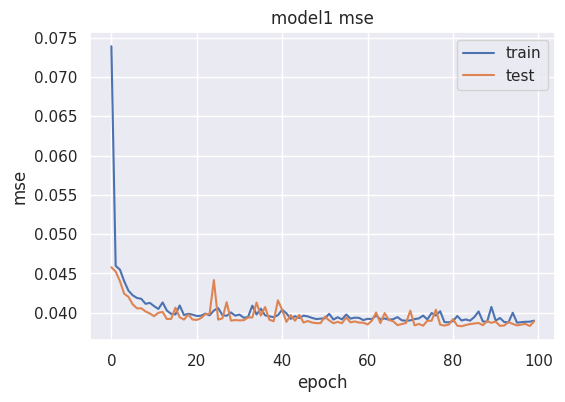

In [22]:
plt.plot(hist1.history['mse'])
plt.plot(hist1.history['val_mse'])
plt.title('model1 mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()